In [1]:
# Imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy Logic - Lab 1

## Variables

- Temp: Freezing, Cool, Warm, Hot
- Cover: Sunny, Partly, Overcast

## Step 1: Define Fuzzy Variables (Antecedents and Consequents)

First, we need to define our input variables (antecedents) and output variable (consequent). In fuzzy logic, these are called linguistic variables because they use natural language terms.

In [2]:
# Define input variables (antecedents)
temperature = ctrl.Antecedent(np.arange(10, 111, 1), "temperature")
cover = ctrl.Antecedent(np.arange(0, 101, 1), "cover")

# Define output variable (consequent)
speed = ctrl.Consequent(np.arange(0, 101, 1), "speed")

## Step 2: Define Membership Functions

- **Trapezoidal (trapmf)**: Flat-topped trapezoid shape, good for ranges with clear boundaries
- **Triangular (trimf)**: Triangle shape, good for categories with a clear peak

### Temperature Membership Functions:
- **Freezing**: 10°C to 50°C (trapezoidal) : [10, 10, 30, 50]
- **Cool**: 30°C to 70°C (triangular, peak at 50°C) : [30, 50, 70]
- **Warm**: 50°C to 90°C (triangular, peak at 70°C) : [50, 70, 90]
- **Hot**: 70°C to 110°C (trapezoidal) : [70, 90, 110, 110]

c:\Users\Asus\Downloads\fuzzy\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


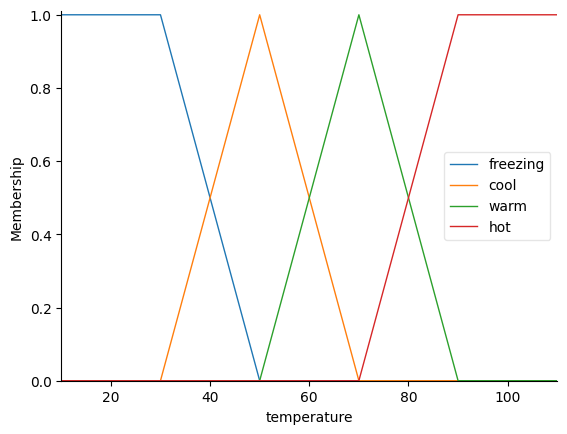

In [3]:
# Define membership functions for temperature
temperature["freezing"] = fuzz.trapmf(temperature.universe, [10, 10, 30, 50])
temperature["cool"] = fuzz.trimf(temperature.universe, [30, 50, 70])
temperature["warm"] = fuzz.trimf(temperature.universe, [50, 70, 90])
temperature["hot"] = fuzz.trapmf(temperature.universe, [70, 90, 110, 110])

# Visualize temperature membership functions
temperature.view()

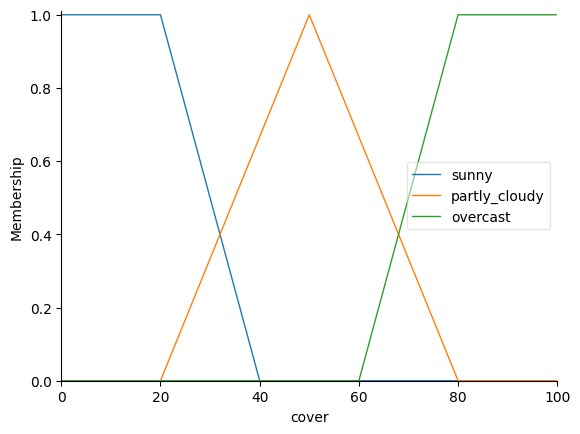

In [4]:
# Define membership functions for cover
cover["sunny"] = fuzz.trapmf(cover.universe, [0, 0, 20, 40])
cover["partly_cloudy"] = fuzz.trimf(cover.universe, [20, 50, 80])
cover["overcast"] = fuzz.trapmf(cover.universe, [60, 80, 100, 100])

# Visualize cover membership functions
cover.view()

### Output Membership Functions: Speed

- Slow
- Fast

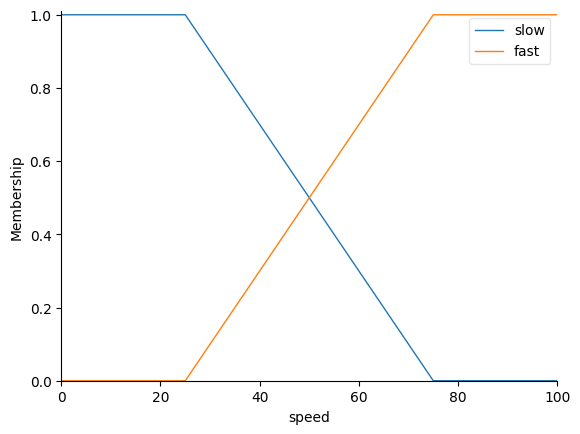

In [5]:
# Define membership functions for speed
speed["slow"] = fuzz.trapmf(speed.universe, [0, 0, 25, 75])
speed["fast"] = fuzz.trapmf(speed.universe, [25, 75, 100, 100])
# Visualize cooking time membership functions
speed.view()

## Step 3: Define Fuzzy Rules

Each rule follows the format:

**IF** [condition1] **AND** [condition2] **THEN** [output]

In [6]:
# Define fuzzy rules
rules = [
    ctrl.Rule(cover["sunny"] & temperature["warm"], speed["fast"]),
    ctrl.Rule(cover["partly_cloudy"] & temperature["cool"], speed["slow"]),
]

## Step 4: Create Control System and Simulation

In [18]:
# Create control system
car_ctrl = ctrl.ControlSystem(rules)
driving_simulation = ctrl.ControlSystemSimulation(car_ctrl)

print("Fuzzy control system created.")

Fuzzy control system created.


## Step 5: Testing 

### Number 1

🌡️ Temperature memberships at 65°F:
Freezing: 0.000
Cool: 0.250
Warm: 0.750
Hot: 0.000

😶‍🌫️ Cover memberships at 25%:
Sunny: 0.750
Partly Cloudy: 0.167
Overcast: 0.000

 Rule activation = min(0.167, 0.250) = 0.167
🏎️ Speed: 65.03


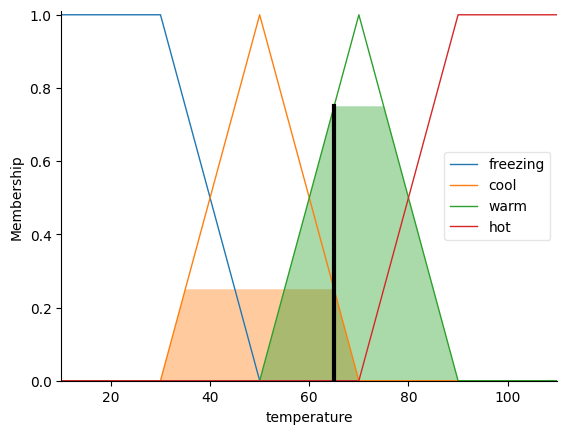

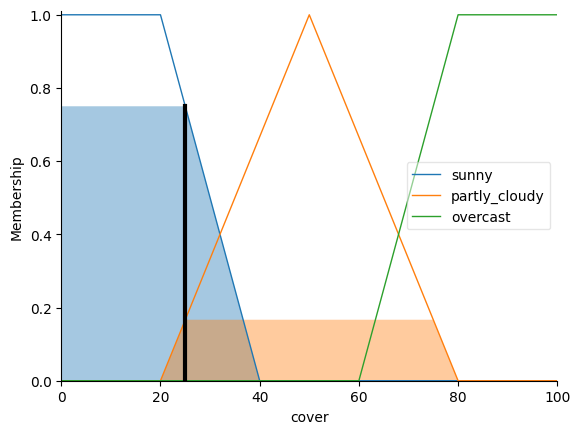

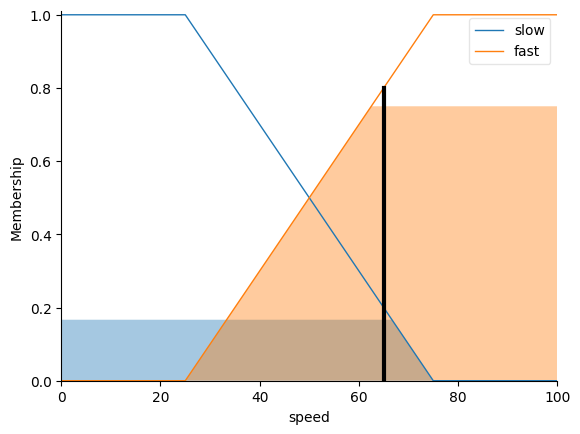

In [8]:
test_temp = 65
test_cover = 25

driving_simulation.input["temperature"] = test_temp
driving_simulation.input["cover"] = test_cover

driving_simulation.compute()

result = driving_simulation.output["speed"]

freezing_membership = fuzz.interp_membership(
    temperature.universe, temperature["freezing"].mf, test_temp
)
cool_membership = fuzz.interp_membership(
    temperature.universe, temperature["cool"].mf, test_temp
)
warm_membership = fuzz.interp_membership(
    temperature.universe, temperature["warm"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

sunny_membership = fuzz.interp_membership(cover.universe, cover["sunny"].mf, test_cover)
partly_cloudy_membership = fuzz.interp_membership(
    cover.universe, cover["partly_cloudy"].mf, test_cover
)
overcast_membership = fuzz.interp_membership(
    cover.universe, cover["overcast"].mf, test_cover
)

print(f"🌡️ Temperature memberships at {test_temp}°F:")
print(f"Freezing: {freezing_membership:.3f}")
print(f"Cool: {cool_membership:.3f}")
print(f"Warm: {warm_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")

print(f"\n😶‍🌫️ Cover memberships at {test_cover}%:")
print(f"Sunny: {sunny_membership:.3f}")
print(f"Partly Cloudy: {partly_cloudy_membership:.3f}")
print(f"Overcast: {overcast_membership:.3f}")

print(
    f"\n Rule activation = min({partly_cloudy_membership:.3f}, {cool_membership:.3f}) = {min(partly_cloudy_membership, cool_membership):.3f}"
)
print(f"🏎️ Speed: {result:.2f}")


temperature.view(sim=driving_simulation)
cover.view(sim=driving_simulation)
speed.view(sim=driving_simulation)

### Number 2

🌡️ Temperature memberships at 62°F:
Freezing: 0.000
Cool: 0.400
Warm: 0.600
Hot: 0.000

😶‍🌫️ Cover memberships at 47%:
Sunny: 0.000
Partly Cloudy: 0.900
Overcast: 0.000

 Rule activation = min(0.900, 0.400) = 0.400
🏎️ Speed: 32.76


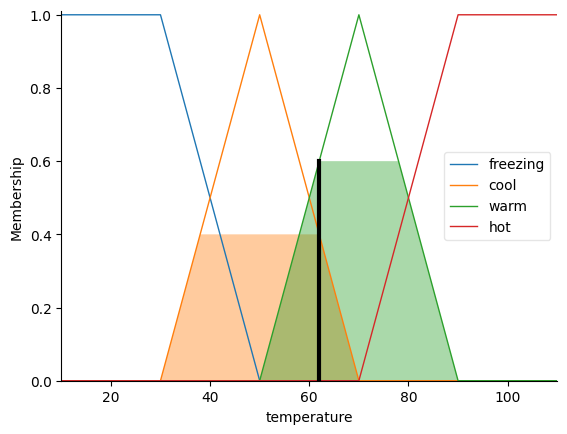

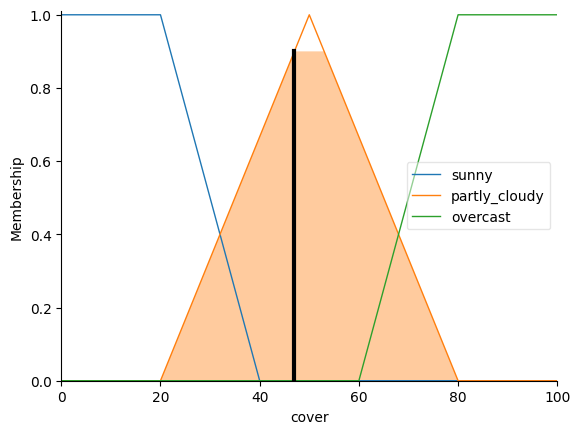

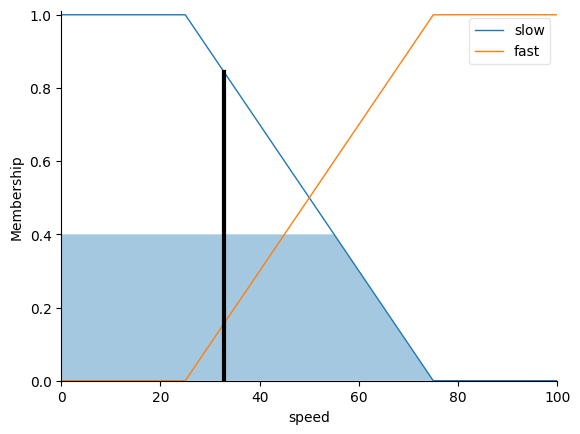

In [9]:
test_temp = 62
test_cover = 47

driving_simulation.input["temperature"] = test_temp
driving_simulation.input["cover"] = test_cover

driving_simulation.compute()

result = driving_simulation.output["speed"]

freezing_membership = fuzz.interp_membership(
    temperature.universe, temperature["freezing"].mf, test_temp
)
cool_membership = fuzz.interp_membership(
    temperature.universe, temperature["cool"].mf, test_temp
)
warm_membership = fuzz.interp_membership(
    temperature.universe, temperature["warm"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

sunny_membership = fuzz.interp_membership(cover.universe, cover["sunny"].mf, test_cover)
partly_cloudy_membership = fuzz.interp_membership(
    cover.universe, cover["partly_cloudy"].mf, test_cover
)
overcast_membership = fuzz.interp_membership(
    cover.universe, cover["overcast"].mf, test_cover
)

print(f"🌡️ Temperature memberships at {test_temp}°F:")
print(f"Freezing: {freezing_membership:.3f}")
print(f"Cool: {cool_membership:.3f}")
print(f"Warm: {warm_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")

print(f"\n😶‍🌫️ Cover memberships at {test_cover}%:")
print(f"Sunny: {sunny_membership:.3f}")
print(f"Partly Cloudy: {partly_cloudy_membership:.3f}")
print(f"Overcast: {overcast_membership:.3f}")

print(
    f"\n Rule activation = min({partly_cloudy_membership:.3f}, {cool_membership:.3f}) = {min(partly_cloudy_membership, cool_membership):.3f}"
)
print(f"🏎️ Speed: {result:.2f}")


temperature.view(sim=driving_simulation)
cover.view(sim=driving_simulation)
speed.view(sim=driving_simulation)

### Number 3

🌡️ Temperature memberships at 75°F:
Freezing: 0.000
Cool: 0.000
Warm: 0.750
Hot: 0.250

😶‍🌫️ Cover memberships at 30%:
Sunny: 0.500
Partly Cloudy: 0.333
Overcast: 0.000

 Rule activation = min(0.333, 0.000) = 0.000
🏎️ Speed: 68.33


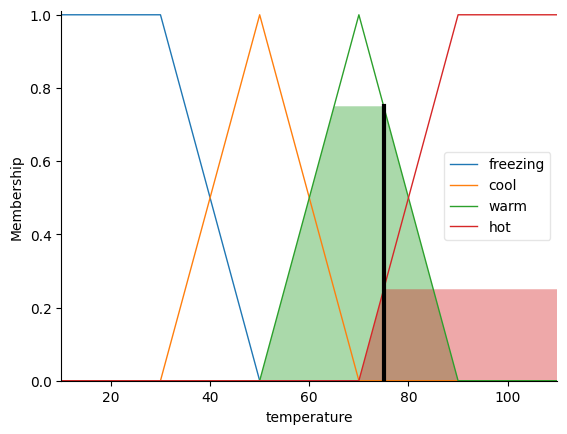

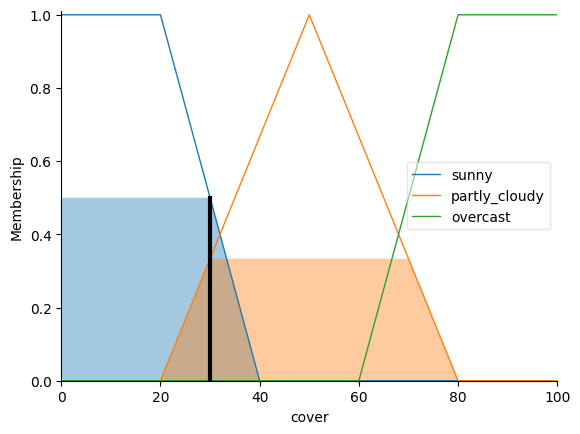

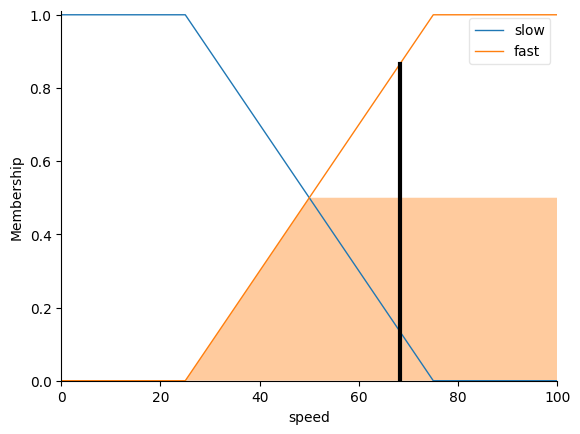

In [10]:
test_temp = 75
test_cover = 30

driving_simulation.input["temperature"] = test_temp
driving_simulation.input["cover"] = test_cover

driving_simulation.compute()

result = driving_simulation.output["speed"]

freezing_membership = fuzz.interp_membership(
    temperature.universe, temperature["freezing"].mf, test_temp
)
cool_membership = fuzz.interp_membership(
    temperature.universe, temperature["cool"].mf, test_temp
)
warm_membership = fuzz.interp_membership(
    temperature.universe, temperature["warm"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

sunny_membership = fuzz.interp_membership(cover.universe, cover["sunny"].mf, test_cover)
partly_cloudy_membership = fuzz.interp_membership(
    cover.universe, cover["partly_cloudy"].mf, test_cover
)
overcast_membership = fuzz.interp_membership(
    cover.universe, cover["overcast"].mf, test_cover
)

print(f"🌡️ Temperature memberships at {test_temp}°F:")
print(f"Freezing: {freezing_membership:.3f}")
print(f"Cool: {cool_membership:.3f}")
print(f"Warm: {warm_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")

print(f"\n😶‍🌫️ Cover memberships at {test_cover}%:")
print(f"Sunny: {sunny_membership:.3f}")
print(f"Partly Cloudy: {partly_cloudy_membership:.3f}")
print(f"Overcast: {overcast_membership:.3f}")

print(
    f"\n Rule activation = min({partly_cloudy_membership:.3f}, {cool_membership:.3f}) = {min(partly_cloudy_membership, cool_membership):.3f}"
)
print(f"🏎️ Speed: {result:.2f}")


temperature.view(sim=driving_simulation)
cover.view(sim=driving_simulation)
speed.view(sim=driving_simulation)


### Number 4

🌡️ Temperature memberships at 62°F:
Freezing: 0.000
Cool: 0.400
Warm: 0.600
Hot: 0.000

😶‍🌫️ Cover memberships at 47%:
Sunny: 0.000
Partly Cloudy: 0.900
Overcast: 0.000

 Rule activation = min(0.900, 0.400) = 0.400
🏎️ Speed: 32.76


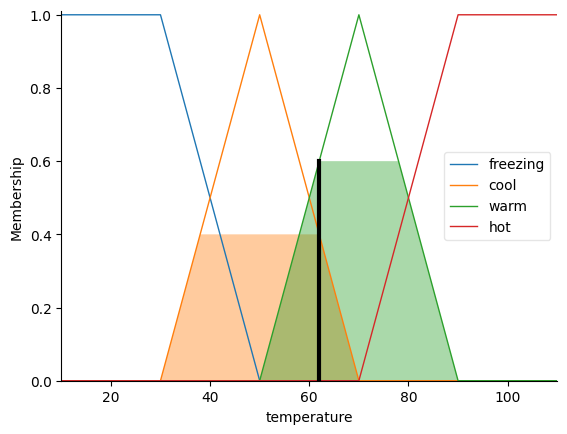

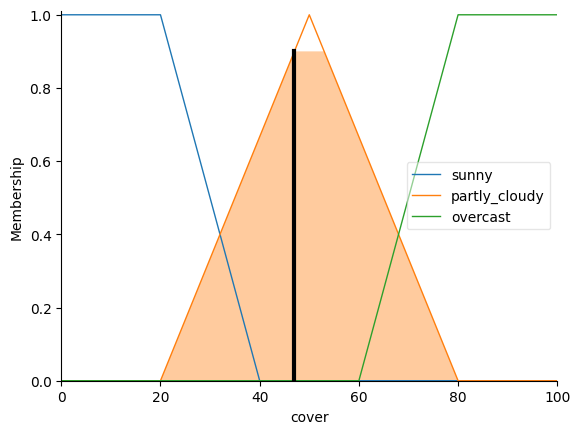

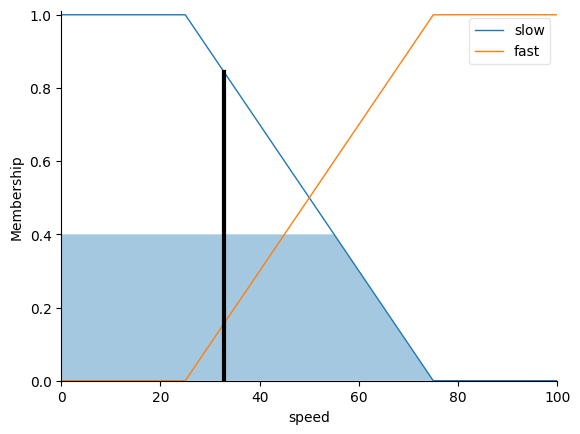

In [13]:
test_temp = 53
test_cover = 65

driving_simulation.input["temperature"] = test_temp
driving_simulation.input["cover"] = test_cover

driving_simulation.compute()

result = driving_simulation.output["speed"]

freezing_membership = fuzz.interp_membership(
    temperature.universe, temperature["freezing"].mf, test_temp
)
cool_membership = fuzz.interp_membership(
    temperature.universe, temperature["cool"].mf, test_temp
)
warm_membership = fuzz.interp_membership(
    temperature.universe, temperature["warm"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

sunny_membership = fuzz.interp_membership(cover.universe, cover["sunny"].mf, test_cover)
partly_cloudy_membership = fuzz.interp_membership(
    cover.universe, cover["partly_cloudy"].mf, test_cover
)
overcast_membership = fuzz.interp_membership(
    cover.universe, cover["overcast"].mf, test_cover
)

print(f"🌡️ Temperature memberships at {test_temp}°F:")
print(f"Freezing: {freezing_membership:.3f}")
print(f"Cool: {cool_membership:.3f}")
print(f"Warm: {warm_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")

print(f"\n😶‍🌫️ Cover memberships at {test_cover}%:")
print(f"Sunny: {sunny_membership:.3f}")
print(f"Partly Cloudy: {partly_cloudy_membership:.3f}")
print(f"Overcast: {overcast_membership:.3f}")

print(
    f"\n Rule activation = min({partly_cloudy_membership:.3f}, {cool_membership:.3f}) = {min(partly_cloudy_membership, cool_membership):.3f}"
)
print(f"🏎️ Speed: {result:.2f}")


temperature.view(sim=driving_simulation)
cover.view(sim=driving_simulation)
speed.view(sim=driving_simulation)


### Number 5

🌡️ Temperature memberships at 68°F:
Freezing: 0.000
Cool: 0.100
Warm: 0.900
Hot: 0.000

😶‍🌫️ Cover memberships at 70%:
Sunny: 0.000
Partly Cloudy: 0.333
Overcast: 0.500

 Rule activation = min(0.333, 0.100) = 0.100
🏎️ Speed: 36.26


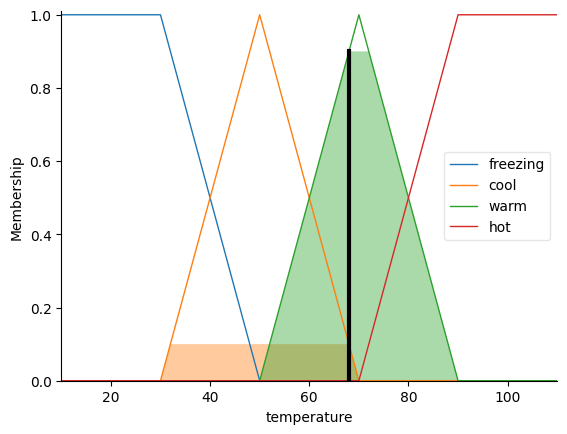

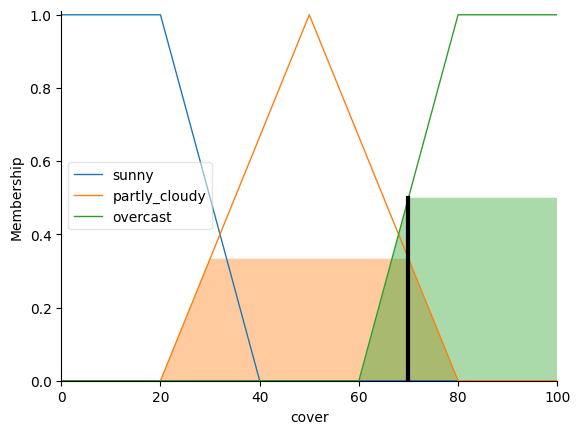

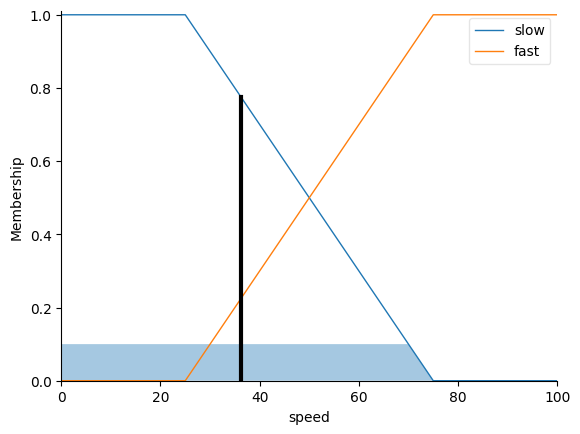

In [12]:
test_temp = 68
test_cover = 70

driving_simulation.input["temperature"] = test_temp
driving_simulation.input["cover"] = test_cover

driving_simulation.compute()

result = driving_simulation.output["speed"]

freezing_membership = fuzz.interp_membership(
    temperature.universe, temperature["freezing"].mf, test_temp
)
cool_membership = fuzz.interp_membership(
    temperature.universe, temperature["cool"].mf, test_temp
)
warm_membership = fuzz.interp_membership(
    temperature.universe, temperature["warm"].mf, test_temp
)
hot_membership = fuzz.interp_membership(
    temperature.universe, temperature["hot"].mf, test_temp
)

sunny_membership = fuzz.interp_membership(cover.universe, cover["sunny"].mf, test_cover)
partly_cloudy_membership = fuzz.interp_membership(
    cover.universe, cover["partly_cloudy"].mf, test_cover
)
overcast_membership = fuzz.interp_membership(
    cover.universe, cover["overcast"].mf, test_cover
)

print(f"🌡️ Temperature memberships at {test_temp}°F:")
print(f"Freezing: {freezing_membership:.3f}")
print(f"Cool: {cool_membership:.3f}")
print(f"Warm: {warm_membership:.3f}")
print(f"Hot: {hot_membership:.3f}")

print(f"\n😶‍🌫️ Cover memberships at {test_cover}%:")
print(f"Sunny: {sunny_membership:.3f}")
print(f"Partly Cloudy: {partly_cloudy_membership:.3f}")
print(f"Overcast: {overcast_membership:.3f}")

print(
    f"\n Rule activation = min({partly_cloudy_membership:.3f}, {cool_membership:.3f}) = {min(partly_cloudy_membership, cool_membership):.3f}"
)
print(f"🏎️ Speed: {result:.2f}")


temperature.view(sim=driving_simulation)
cover.view(sim=driving_simulation)
speed.view(sim=driving_simulation)
